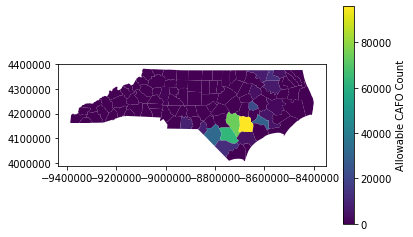

In [36]:
## Python Integration Assignment - BIOS 611

# Importing Packages
import pandas as pd
import geopandas as gpd
import descartes
import zipfile
from plotnine import ggplot, geom_point, aes

# Read in previous data
finalData = pd.read_csv("sorData/finalData.csv")
finalData['county_name'] = finalData['county_name'].str.upper()

# Extract GIS data and unzip it
with zipfile.ZipFile("sorData/NC_Counties.zip","r") as zip_ref:
    zip_ref.extractall("sorData")

# Read in the .shp file with geopandas
shape = gpd.read_file("sorData/counties.shp")
shapeData = shape.rename(columns={'CO_NAME':'county_name'})
# Dropping all the unneeded columns
shapeData = shapeData.drop(columns=['FID','OBJECTID','PERIMETER',
                            'CO_ABBR','ACRES','Shape_Leng',
                           'RO','SHAPE_Le_1','SHAPE_Area'])

# Merging the data sets together
geoData = shapeData.merge(finalData, how='right')

# Plotting the final result based on allowable CAFO count
geoData.plot(column='allowable_count', legend=True, legend_kwds={'label': "Allowable CAFO Count"})